c:\Users\Eren Jaeger\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Handedness: [classification {
  index: 1
  score: 0.95965457
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.563674152
  y: 0.959894717
  z: 1.87986515e-007
}
landmark {
  x: 0.55080992
  y: 0.919433594
  z: -0.0122384932
}
landmark {
  x: 0.530479908
  y: 0.891987383
  z: -0.0179235227
}
landmark {
  x: 0.511017442
  y: 0.88230449
  z: -0.0213428922
}
landmark {
  x: 0.494758815
  y: 0.878196716
  z: -0.0239218287
}
landmark {
  x: 0.512054741
  y: 0.944167614
  z: -0.0142784026
}
landmark {
  x: 0.484537333
  y: 0.942393839
  z: -0.0214877818
}
landmark {
  x: 0.467791885
  y: 0.939574897
  z: -0.0260179378
}
landmark {
  x: 0.455069065
  y: 0.936467767
  z: -0.0282856338
}
landmark {
  x: 0.511751413
  y: 0.972457826
  z: -0.0102470275
}
landmark {
  x: 0.485944927
  y: 0.972435892
  z: -0.0168869421
}
landmark {
  x: 0.469817251
  y: 0.966621161
  z: -0.0199508667
}
landmark {
  x: 0.4569574
  y: 0.960171461
  z: -0.0213365238
}
landmark {
  x: 0.512509525
  y: 0.992562413
 

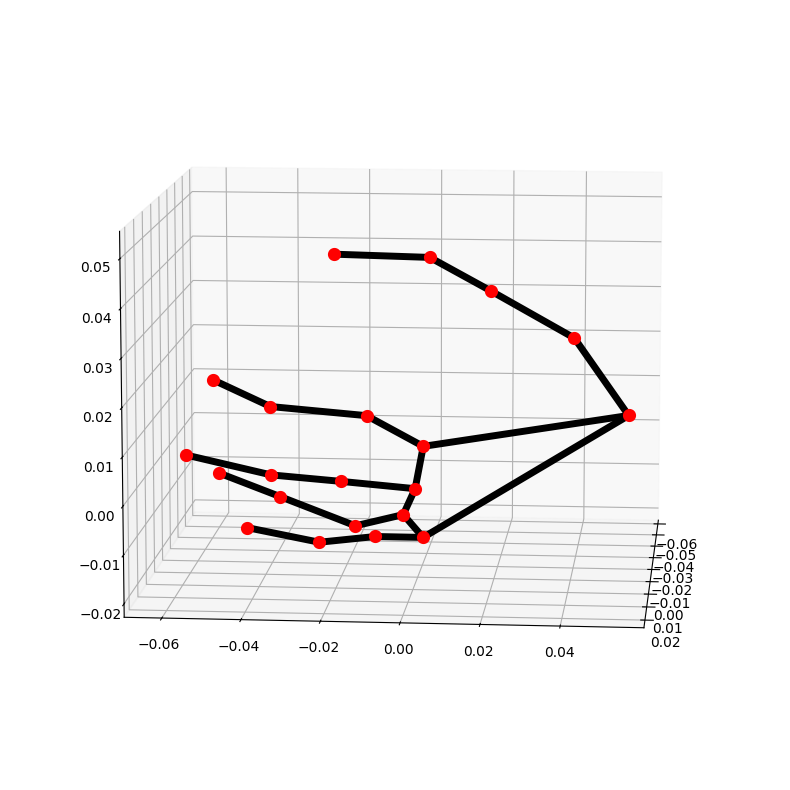

In [1]:
import mediapipe as mp
import cv2

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

IMAGE_FILES = ["Data\spreadthesign - VLC media player 28-08-2024 13_15_36.png"]

with mp.solutions.hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [ ]:
landm = np.zeros((hands_num * 2 + pose_num + face_num, 3))
image = cv2.flip(cv2.imread(file), 1)
# Convert the BGR image to RGB before processing.

# hands = mp.solutions.hands.Hands()

results_hands = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
##If results contains the landmarks
if results_hands.multi_hand_landmarks:
    print(results_hands.multi_hand_landmarks)
    ##Storing the all_landmakrs array
    for i, hand_landmarks in enumerate(results_hands.multi_hand_landmarks):
        if results_hands.multi_handedness[i].classification[0].index == 0:
            ##Storing in the first 21 rows
            landm[:hands_num, :] = np.array([(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark])  ## Right Hand
            
        else:
            landm[hands_num:hands_num * 2, :] = np.array([(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark])

In [ ]:
results_pose = pose.process(frame)
print(results_pose.pose_landmarks.landmark)
##If landmarks exists
if results_pose.pose_landmarks:
    landm[hands_num * 2: hands_num * 2 + pose_num, :] = np.array([(lm.x, lm.y, lm.z) for lm in results_pose.pose_landmarks.landmark])[filtered_pose]

In [ ]:
##Getting the face landmarks
# def get_face(frame):
results_face = face.process(frame)
print(results_face.multi_face_landmarks)
##If landmarks exists
if results_face.multi_face_landmarks:
    all_landmarks[hands_num * 2 + pose_num:, :] = np.array([(lm.x, lm.y, lm.z) for lm in results_face.multi_face_landmarks[0].landmark])[filtered_face]